### Correlation : Pearson vs Spearman

| Feature | Pearson | Spearman |
| --- | --- | --- |
| Relationship | Linear | Monotonic |
| Data type | Continuous | Continuous/Ordinal |
| Sensitive to Outliers | Yes | No |
| Better with normal distribution | Yes | No |
| Computed using | Covariance | Rank-based |

### Example

We construct a dataset consisting of 2 features - time spent studying and exam results. The relationship between the 2 variables is set up as 
a logarithmic one - there are dimishing returns the more study one does. 

There are 3 distributions of data for the study time variable, uniform, normal and skewed.

You can modify the following cell in a couple of interesting ways: 
-  Change the function used to calculate y
- Add or remove noise from the y values by commenting/uncommenting the relevant lines (marked with a comment)

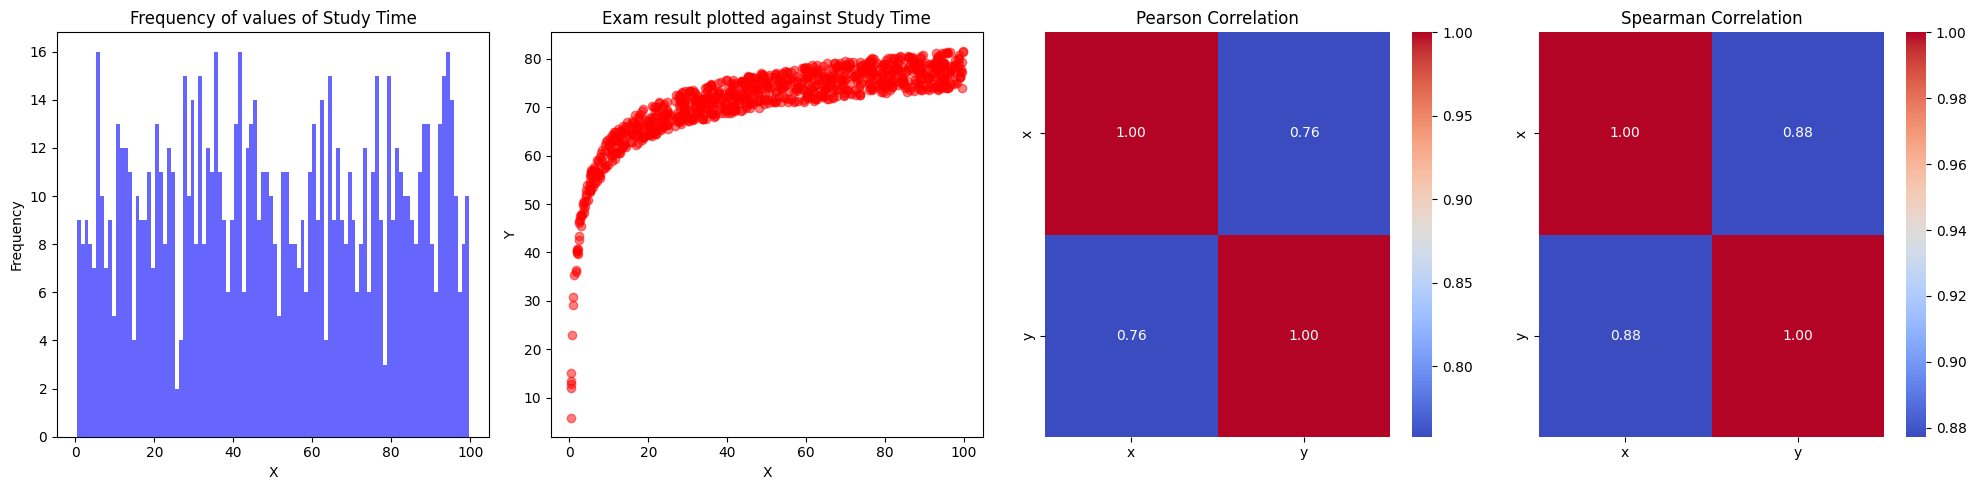

/tmp/ipykernel_372600/3337516823.py:22: RuntimeWarning: divide by zero encountered in divide
  y = 100 - 70 / x**0.25


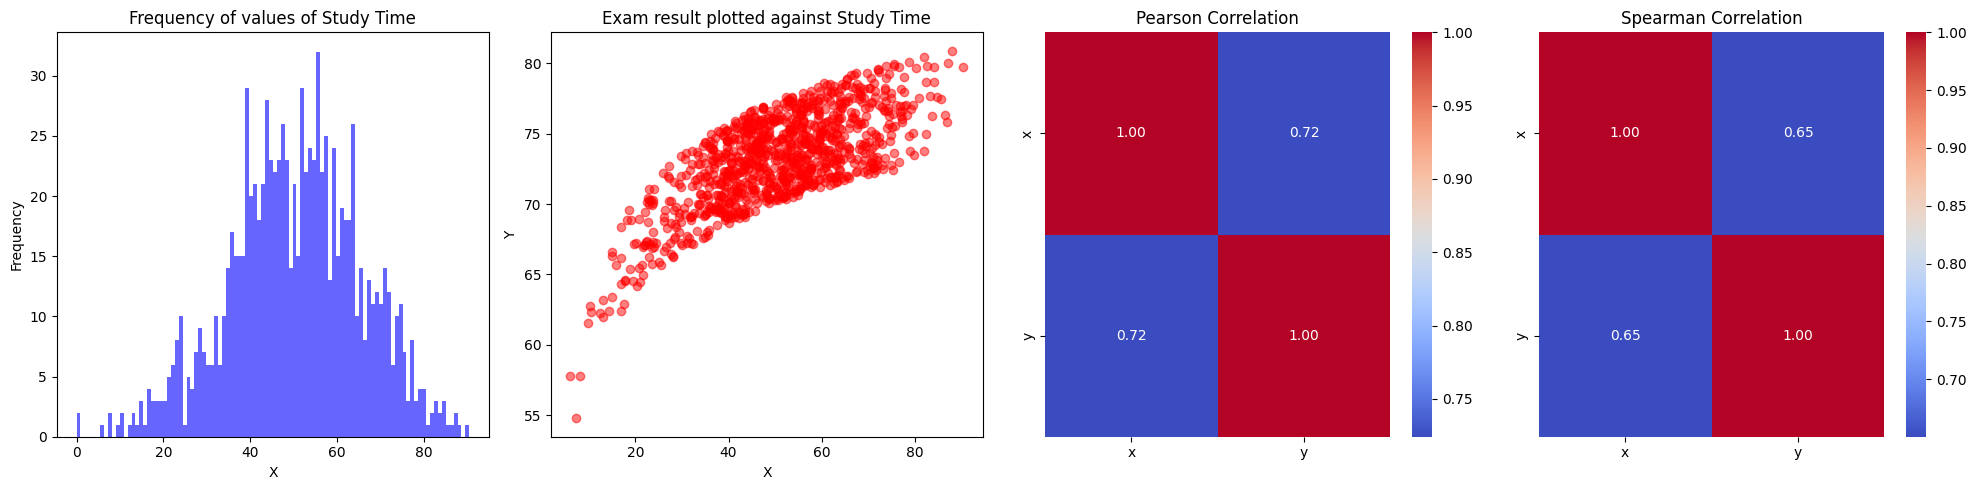

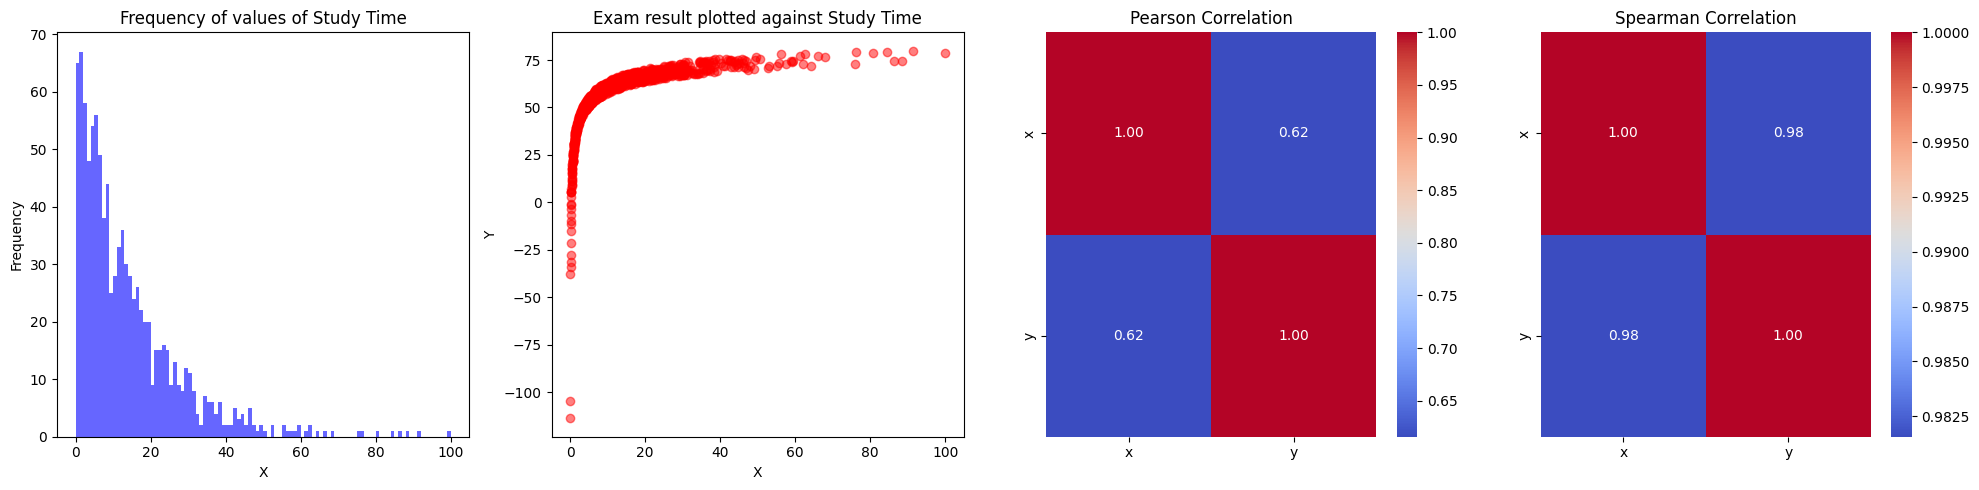

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(11)

x_uniform = np.random.random(1000) * 100

x_normal = np.random.normal(loc=50, scale=15, size=1000)
x_normal = np.clip(x_normal, 0, 100)

x_skewed = np.random.exponential(scale=20, size=1000)
x_skewed = (x_skewed / np.max(x_skewed)) * 100
x_skewed = np.clip(x_skewed, 0, 100)

study_time_values = [x_uniform, x_normal, x_skewed]

for x in study_time_values:
    
    # Create variable y, a function of x
    y = 100 - 70 / x**0.25
    
    # Add some random noise
    noise = np.random.uniform(-0.05, 0.05, size=len(x))
    y_noisy = y * (1 + noise)

    # Try swapping these 2 lines to see the effect on the correlation scores
    df = pd.DataFrame({"x": x, "y": y_noisy})
    # df = pd.DataFrame({"x": x, "y": y})

    # Compute correlation matrices
    pearson_corr = df.corr(method="pearson")
    spearman_corr = df.corr(method="spearman")
    print(pearson_corr)
    print()

    # Create subplots in one row
    fig, axes = plt.subplots(1, 4, figsize=(20, 5)) 

    # Histogram showing frequency of values for x
    axes[0].hist(x, bins=100, color="blue", alpha=0.6)
    axes[0].set_title("Frequency of values of Study Time")
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Frequency")

    # Scatterplot plotting x against y
    axes[1].scatter(x, y_noisy, alpha=0.5, color="red")
    axes[1].set_title("Exam result plotted against Study Time")
    axes[1].set_xlabel("X")
    axes[1].set_ylabel("Y")

    # Heatmap showing Pearson correlation matrix
    sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[2])
    axes[2].set_title("Pearson Correlation")

    # Heatmap showing Spearman correlation matrix
    sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[3])
    axes[3].set_title("Spearman Correlation")

    plt.tight_layout()
    plt.show()


In [2]:
type(np.nan)

float

In [ ]:
def replace_nan(row):
    return 'Unknown' if row['Location'] == np.nan else row['Location']

df['Location'] = df.apply(replace_nan, axis=1)